STOCK DATASET DATA EXPLORATORY ANALYSIS FROM YAHOO FINANCE

In [25]:
#Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from pandas_datareader import *
import math
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [26]:
#Scraping Dataset from Yahoo Finance
START = '2012-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)



In [27]:
#Latest Stock Data
stock_dataset.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-04,165.550003,162.100006,164.490005,163.169998,83737200.0,163.169998
2022-03-07,165.020004,159.039993,163.360001,159.300003,96418800.0,159.300003
2022-03-08,162.880005,155.800003,158.820007,157.440002,131148300.0,157.440002
2022-03-09,163.410004,159.410004,161.479996,162.949997,91281100.0,162.949997
2022-03-10,160.389999,155.979996,160.199997,158.520004,96831210.0,158.520004


In [28]:
#Start of the dataset
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575913
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643500
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783868
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897017


In [29]:
#Shape of Dataset
stock_dataset.shape

(2564, 6)

In [30]:
#Info Dataset
stock_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2564 entries, 2012-01-03 to 2022-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2564 non-null   float64
 1   Low        2564 non-null   float64
 2   Open       2564 non-null   float64
 3   Close      2564 non-null   float64
 4   Volume     2564 non-null   float64
 5   Adj Close  2564 non-null   float64
dtypes: float64(6)
memory usage: 140.2 KB


In [31]:
#Describe Dataset
stock_dataset.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2564.000000,2564.000000,2564.000000,2564.000000,2.564000e+03,2564.000000
mean,51.753128,50.676631,51.212006,51.234816,2.128864e+08,49.446473
std,42.080494,41.076879,41.578020,41.598548,1.750093e+08,42.224265
min,14.271429,13.753571,13.856071,13.947500,4.100000e+07,12.119164
25%,23.984733,23.523750,23.752947,23.751250,1.016943e+08,21.407778
50%,33.246250,32.789999,33.132502,33.073750,1.492572e+08,30.766604
75%,55.878126,54.746250,55.271250,55.375626,2.619146e+08,53.866444
max,182.940002,179.119995,182.630005,182.009995,1.506120e+09,181.778397


In [32]:
#Checking for Null Values
stock_dataset.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

<AxesSubplot:>

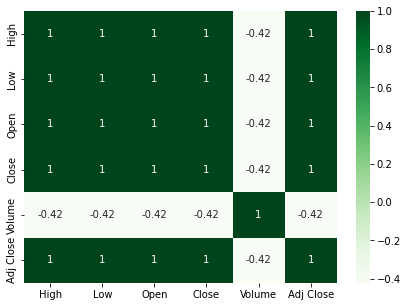

In [33]:
#Plottin Heat Map
plt.figure(figsize=(7,5))
sns.heatmap(stock_dataset.corr(),cmap='Greens',annot=True)

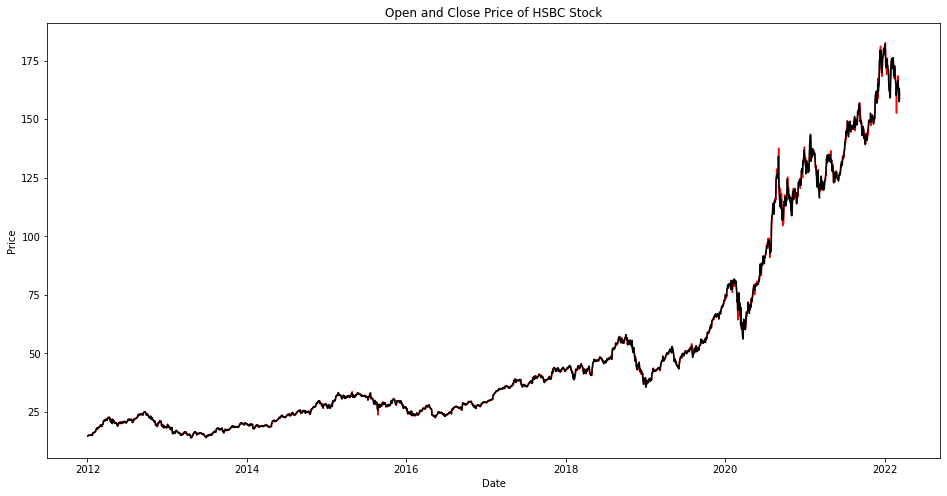

In [34]:
#Plotting Open and Closing Prices of AAPL Stock
plt.figure(figsize=(16,8))
plt.title("Open and Close Price of AAPL Stock")
plt.plot(stock_dataset['Open'], 'red')
plt.plot(stock_dataset['Close'], 'black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

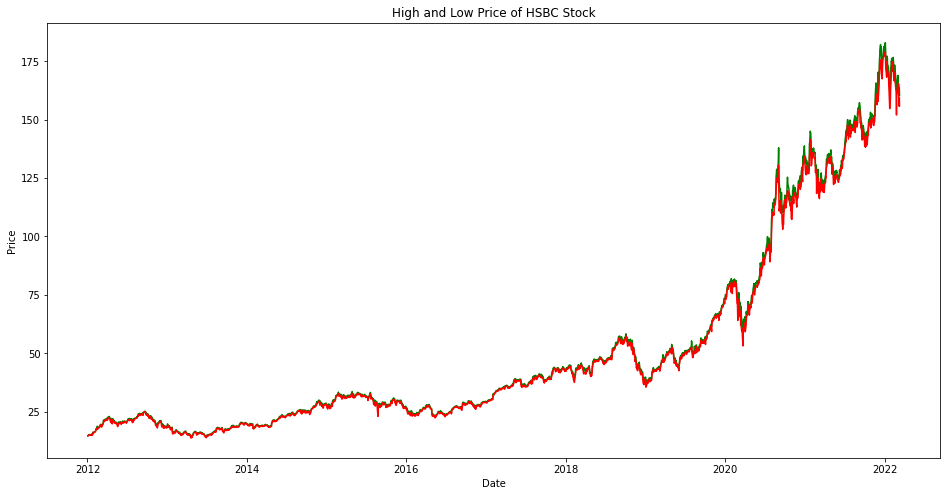

In [35]:
#Plotting High and Low Price Prices
plt.figure(figsize=(16,8))
plt.title("High and Low Price of AAPL Stock")
plt.plot(stock_dataset['High'], 'green')
plt.plot(stock_dataset['Low'], 'red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

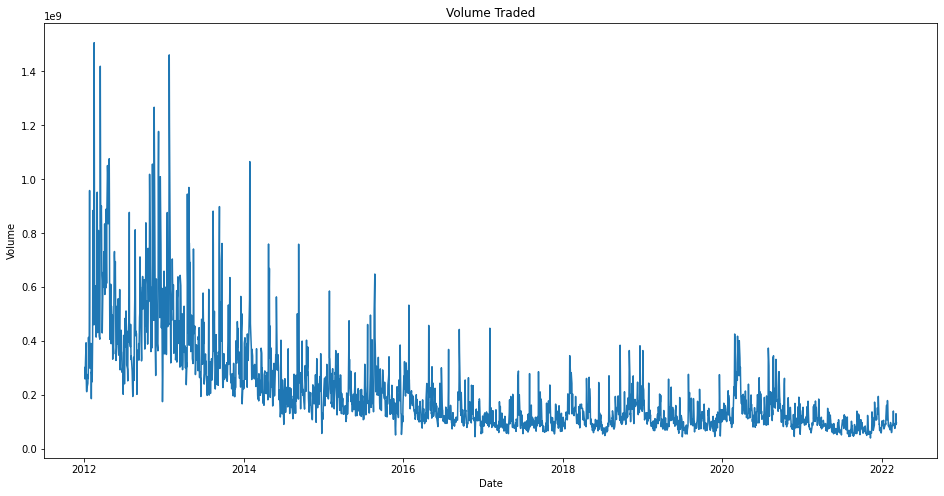

In [36]:
#Plotting Total Volume of HSBC being traded
plt.figure(figsize=(16, 8))
plt.title("Volume Traded")
plt.plot(stock_dataset['Volume'])
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()


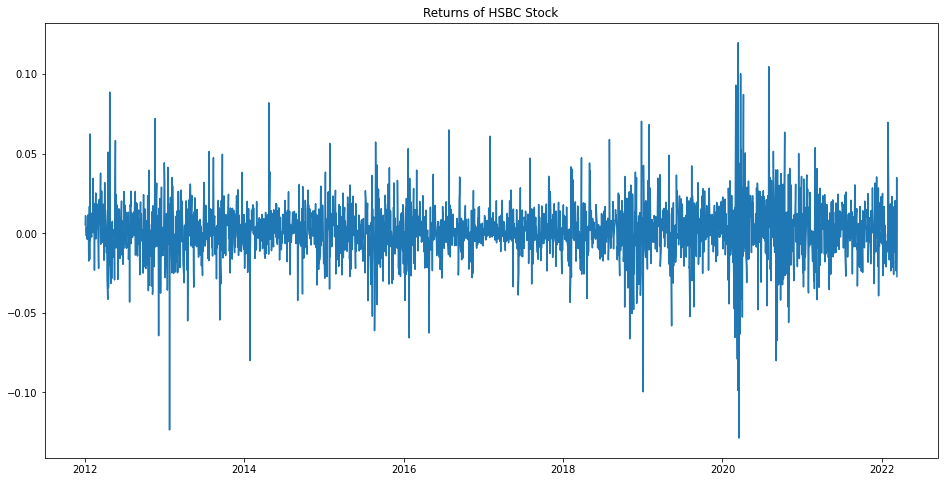

In [37]:
#Plotting Return on Average of AAPL Stock
stock_dataset['Daily Return'] = stock_dataset['Adj Close'].pct_change()
plt.figure(figsize=(16, 8))
plt.title("Returns of AAPL Stock")
plt.plot(stock_dataset['Daily Return'])
plt.show()


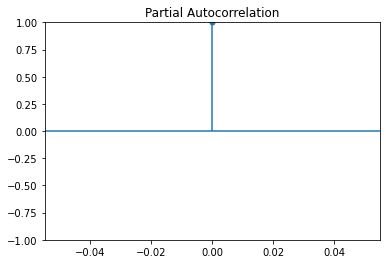

In [38]:
#Plotting PACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
prices = stock_dataset.Close
returns = stock_dataset['Adj Close'].pct_change()
plot_pacf(returns)
plt.show()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


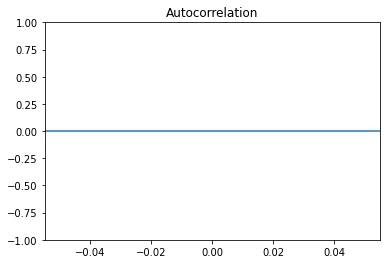

In [39]:
#Plotting ACF Graph
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(returns)
plt.show()

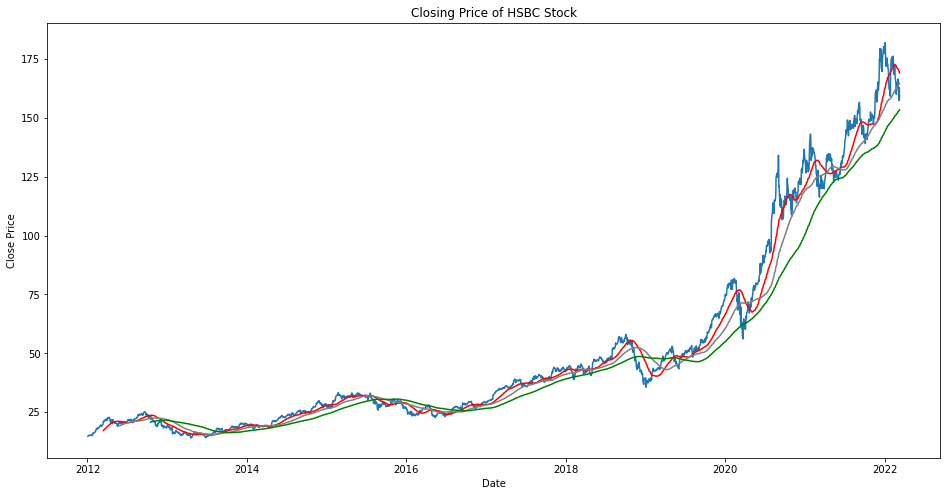

In [40]:
#Moving Average of 50 Days, 100 Days and 200 days
moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of HSBC Stock")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [41]:
#Looking at stock prices back 1 Year
START = '2021-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)
prices = stock_dataset.Close
print(prices)

Date
2021-01-04    25.740000
2021-01-05    25.930000
2021-01-06    28.209999
2021-01-07    28.070000
2021-01-08    27.870001
                ...    
2022-03-04    31.230000
2022-03-07    30.590000
2022-03-08    31.370001
2022-03-09    32.180000
2022-03-10    31.270000
Name: Close, Length: 299, dtype: float64


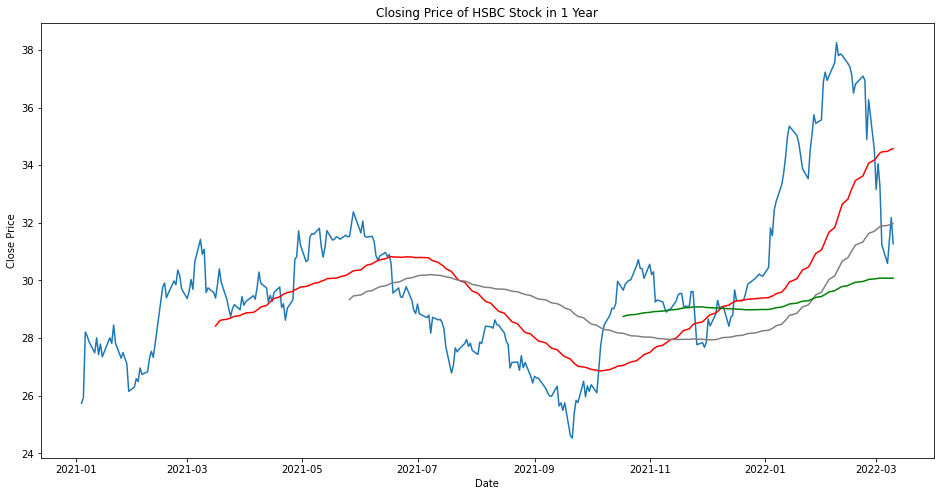

In [42]:
#Moving Average of 50 Days, 100 Days and 200 days

moving_average_50 = stock_dataset.Close.rolling(50).mean()
moving_average_100 = stock_dataset.Close.rolling(100).mean()
moving_average_200 = stock_dataset.Close.rolling(200).mean()


#Plotting 5/100/200 Days Moving Average
plt.figure(figsize=(16,8))
plt.title("Closing Price of HSBC Stock in 1 Year")
plt.plot(stock_dataset['Close'])
plt.plot(moving_average_50, 'red')
plt.plot(moving_average_100, 'grey')
plt.plot(moving_average_200, 'green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

Text(0, 0.5, 'Returns')

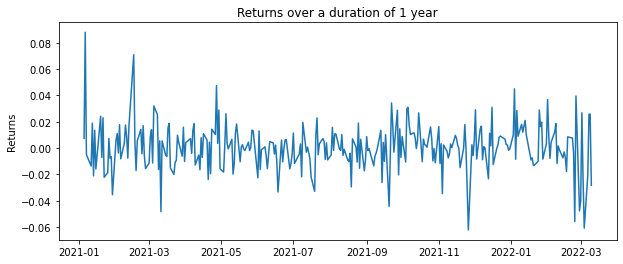

In [43]:
#Plotting Returns over a year
returns = prices.pct_change()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title("Returns over a duration of 1 year")
plt.ylabel('Returns')

In [44]:
#Scraping Dataset from Yahoo Finance
START = '2013-01-01'
END = date.today().strftime("%Y-%m-%d")
stock_dataset = data.DataReader('AAPL', 'yahoo', START, END)

In [45]:
#New Variables for Heat Map
stock_dataset['Open-High'] = stock_dataset['Open']-stock_dataset['High']
stock_dataset['Open-Low'] = stock_dataset['Open'] - stock_dataset['Low']
stock_dataset['Close-High'] = stock_dataset['Close']-stock_dataset['High']
stock_dataset['Close-Low'] = stock_dataset['Close'] - stock_dataset['Low']
stock_dataset['High-Low'] = stock_dataset['High'] - stock_dataset['Low']
stock_dataset['Open-Close'] = stock_dataset['Open'] - stock_dataset['Close']
stock_dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Open-High,Open-Low,Close-High,Close-Low,High-Low,Open-Close
Date,,,,,,,,,,,,
2013-01-02,54.459999,54.009998,54.360001,54.290001,1603200.0,34.127323,-0.099998,0.350002,-0.169998,0.280003,0.450001,0.070000
2013-01-03,53.660000,53.230000,53.590000,53.349998,1339800.0,33.536434,-0.070000,0.360001,-0.310001,0.119999,0.430000,0.240002
2013-01-04,53.820000,53.439999,53.470001,53.680000,1457200.0,33.743877,-0.349998,0.030003,-0.139999,0.240002,0.380001,-0.209999
2013-01-07,53.889999,53.560001,53.790001,53.759998,1432900.0,33.794167,-0.099998,0.230000,-0.130001,0.199997,0.329998,0.030003
2013-01-08,53.270000,52.919998,53.110001,53.180000,1892900.0,33.429562,-0.160000,0.190002,-0.090000,0.260002,0.350002,-0.070000


<AxesSubplot:>

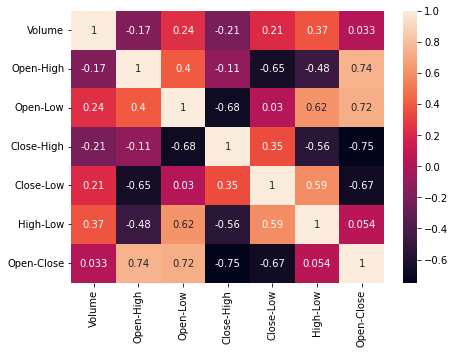

In [46]:
updated_dataset = stock_dataset.copy()
updated_dataset = updated_dataset.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
plt.figure(figsize=(7,5))
sns.heatmap(updated_dataset.corr(),annot=True)